## Week 3: Machine Learning and Data Mining

In [2]:
import pandas as pd
import numpy as np
from mlxtend.classifier import OneRClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from tabulate import tabulate


####  Load Titanic dataset


In [3]:
pd.set_option('display.max_colwidth',None)
titanic = pd.read_csv('./titanic.csv')
print("Number of samples in original data: {}\n".format(len(titanic.index)))
print("Features present in dataset: \n", titanic.columns)
print(titanic.head(10))

Number of samples in original data: 887

Features present in dataset: 
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
   Survived  Pclass                                                Name  \
0         0       3                              Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cumings   
2         1       3                               Miss. Laina Heikkinen   
3         1       1         Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                             Mr. William Henry Allen   
5         0       3                                     Mr. James Moran   
6         0       1                              Mr. Timothy J McCarthy   
7         0       3                       Master. Gosta Leonard Palsson   
8         1       3    Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson   
9         1       2                

### Problem 1: 
#### Q1. Default rule for the titanic Dataset
#### Ans. Since most number of the people are not survived i.e., 545 out of 887 as compared to 342 survided. So, naturally, the default rule for this is **"not survived."**

In [15]:
survived_in_titanic = titanic.loc[titanic['Survived'] == 1]
not_survived_in_titanic = titanic.loc[titanic['Survived'] == 0]


print("Total number of people            : {}".format(len(titanic)))
print("Total number people survived      : {}\nTotal number people not survived  : {} \n"
      .format(len(survived_in_titanic),len(not_survived_in_titanic)))


Total number of people            : 887
Total number people survived      : 342
Total number people not survived  : 545 



### Q2. Best 1R for Titanic dataset
###  Best Selected feature based on 1R is  Feature 1, Name. 
Please find analysis below.

In [16]:
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887,887,887.000000,887.000000,887.000000,887.00000
unique,NaN,NaN,887,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Mr. Antti Gustaf Leinonen,male,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,573,NaN,NaN,NaN,NaN
mean,0.385569,2.305524,NaN,NaN,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,NaN,NaN,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,NaN,NaN,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,31.13750


#####  Split dataset into train and test

In [21]:
le = preprocessing.LabelEncoder()
x_d = titanic[["Pclass","Name","Sex","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare"]]
y = le.fit(titanic["Survived"])
y = le.transform(titanic["Survived"])

xd_train, xd_test, y_train, y_test = train_test_split(x_d, y, test_size = 0.20)
print("No of training samples: {}".format(len(xd_train)))
print("No of test samples: {}".format(len(xd_test)))

No of training samples: 709
No of test samples: 178


#### Train OneR Classifier

Accuracy on training examples : 100.00%
Accuracy on test examples     : 62.36%

Best Selected feature based on 1R is 1, Name


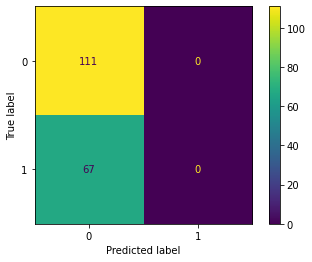

In [22]:
oner = OneRClassifier()
oner.fit(xd_train.to_numpy(),y_train)
y_pred = oner.predict(xd_test.to_numpy())

accuracy = accuracy_score(y_train, oner.predict(xd_train.to_numpy()))
print("Accuracy on training examples : {:.2f}%".format(100*accuracy))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test examples     : {:.2f}%\n".format(100*accuracy))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print("Best Selected feature based on 1R is {}, {}".format(oner.feature_idx_, 
                                                              xd_train.columns[oner.feature_idx_]))

### Q3. Can you produce a second rule based on a single attribute with a good effectiveness?

### Yes, by using 'Sex' Attribute only, the 1R classifier achieves 76.40% accuracy on test set of 178.

Analysis as below.

In [42]:
## Exclude 'Name' attributes and additional 'Fare' attributes seem to be optimal 
x_d_new = titanic[["Sex","Age","Siblings/Spouses Aboard","Parents/Children Aboard", "Pclass"]]
y_new = le.fit(titanic["Survived"])
y_new = le.transform(titanic["Survived"])

In [43]:
xd_train_new, xd_test_new, y_train_new, y_test_new = train_test_split(x_d_new, y_new, test_size = 0.20)

Accuracy on training examples : 79.13%
Accuracy on test examples     : 76.40%

Best Selected feature based on 1R is 0, Sex


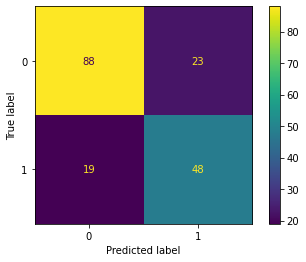

In [41]:
oner = OneRClassifier()
oner.fit(xd_train_new.to_numpy(),y_train_new)
y_pred_new = oner.predict(xd_test_new.to_numpy())



accuracy = accuracy_score(y_train_new, oner.predict(xd_train_new.to_numpy()))
print("Accuracy on training examples : {:.2f}%".format(100*accuracy))


accuracy = accuracy_score(y_test_new, y_pred_new)
print("Accuracy on test examples     : {:.2f}%\n".format(100*accuracy))
ConfusionMatrixDisplay.from_predictions(y_test_new, y_pred_new)
print("Best Selected feature based on 1R is {}, {}".format(oner.feature_idx_, 
                                                              xd_train_new.columns[oner.feature_idx_]))


# Problem 2. 

### Producing 1R with selected stock IBM

#### Loading data

In [44]:
df = pd.read_csv('./IBM.txt', delimiter = " ")
df_raw = df
print("Number of rows in original data: {}".format(len(df.index)))
print("Features: ", df.columns)
df.head(5)

Number of rows in original data: 3692
Features:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted'], dtype='object')


,Date,Open,High,Low,Close,Volume,Adjusted
0,2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771


### A. Calculate daily returns using previous day's close price

In [45]:
df['Daily_returns'] = 100*((df['Close'] - df['Close'].shift())/ df['Close'].shift())
conditions = [(df['Daily_returns'] >= 0.0),(df['Daily_returns'] < 0.0)] 
values = ['Up', 'Down']
df['Decision'] = np.select(conditions, values)

# remove the first row, since it is not possible to calculate daily return
df_new = df[1:]
print("Number of rows in processed data: {}".format(len(df_new.index)))
df_new.head(8)



Number of rows in processed data: 3691


,Date,Open,High,Low,Close,Volume,Adjusted,Daily_returns,Decision
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,1.069190,Up
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,-0.905300,Down
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,1.519199,Up
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,1.183011,Up
5,2007-01-10,98.500000,99.050003,97.930000,98.889999,8744800,64.178978,-1.179176,Down
6,2007-01-11,99.000000,99.900002,98.500000,98.650002,8000700,64.023201,-0.242691,Down
7,2007-01-12,98.989998,99.690002,98.500000,99.339996,6636500,64.471024,0.699436,Up
8,2007-01-16,99.400002,100.839996,99.300003,100.820000,9602200,65.431503,1.489837,Up


### Train 1R Classifier to predict daily returns of 'NEXT DAY' using shift(-1) operation. 

In [46]:
x = df_new[["Open", "High", "Low", "Close", "Volume", "Adjusted","Daily_returns"]]
le = preprocessing.LabelEncoder()
decision = le.fit(df_new["Decision"].shift(-1))
decision = le.transform(df_new["Decision"].shift(-1))

print("Label for Returns of Next Day: ",decision[:10])
print("\nNext day returns are :\n ")
df_new["Decision"].shift(-1).head(10)


Label for Returns of Next Day:  [0 1 1 0 0 1 1 0 0 0]

Next day returns are :
 


1     Down
2       Up
3       Up
4     Down
5     Down
6       Up
7       Up
8     Down
9     Down
10    Down
Name: Decision, dtype: object

In [47]:
xd_train_IBM =  x[:-102]
xd_test_IBM  =  x[-102:-2]

y_train_IBM =  decision[:-102]
y_test_IBM  =  decision[-102:-2]

print("No of training samples : {}".format(len(xd_train_IBM)))
print("No of test samples     : {}\n".format(len(xd_test_IBM)))
print("Training data:")
xd_train_IBM.head()


No of training samples : 3589
No of test samples     : 100

Training data:


,Open,High,Low,Close,Volume,Adjusted,Daily_returns
1,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,1.069190
2,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,-0.905300
3,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,1.519199
4,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,1.183011
5,98.500000,99.050003,97.930000,98.889999,8744800,64.178978,-1.179176


### Accuracy on test examples     : 45.00%  to predict the Next day's trend using attribute 'Daily_returns' of current day

Accuracy on training examples : 99.86%
Accuracy on test examples     : 45.00%

Best Selected feature based on 1R is 6, Daily_returns


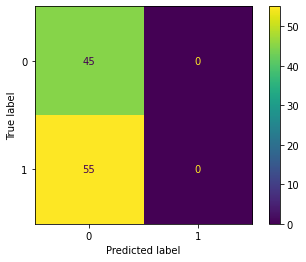

In [48]:
oner = OneRClassifier()
oner.fit(xd_train_IBM.to_numpy(),y_train_IBM)

accuracy = accuracy_score(y_train_IBM, oner.predict(xd_train_IBM.to_numpy()))
print("Accuracy on training examples : {:.2f}%".format(100*accuracy))

y_pred_ibm = oner.predict(xd_test_IBM.to_numpy())
accuracy = accuracy_score(y_test_IBM, y_pred_ibm)
print("Accuracy on test examples     : {:.2f}%\n".format(100*accuracy))
ConfusionMatrixDisplay.from_predictions(y_test_IBM, y_pred_ibm)
print("Best Selected feature based on 1R is {}, {}".format(oner.feature_idx_, 
                                                              x.columns[oner.feature_idx_]))


### B. Moving Average of 5,10,20,50 and 200 days

##### Denote moving average of close price of MA_i

In [4]:
df_raw = pd.read_csv('./IBM.txt', delimiter = " ")

for i in [5,10, 20, 50,200]:
    df_raw['MA_{}'.format(i)] = df_raw['Close'].rolling(window=i).mean()


In [7]:
df_raw.head(25)

,Date,Open,High,Low,Close,Volume,Adjusted,MA_5,MA_10,MA_20,MA_50,MA_200
0,2007-01-03,97.180000,98.400002,96.260002,97.269997,9196800,63.127567,NaN,NaN,NaN,NaN,NaN
1,2007-01-04,97.250000,98.790001,96.879997,98.309998,10524500,63.802544,NaN,NaN,NaN,NaN,NaN
2,2007-01-05,97.599998,97.949997,96.910004,97.419998,7221300,63.224930,NaN,NaN,NaN,NaN,NaN
3,2007-01-08,98.500000,99.500000,98.349998,98.900002,10340000,64.185463,NaN,NaN,NaN,NaN,NaN
4,2007-01-09,99.080002,100.330002,99.070000,100.070000,11108200,64.944771,98.393999,NaN,NaN,NaN,NaN
5,2007-01-10,98.500000,99.050003,97.930000,98.889999,8744800,64.178978,98.717999,NaN,NaN,NaN,NaN
6,2007-01-11,99.000000,99.900002,98.500000,98.650002,8000700,64.023201,98.786000,NaN,NaN,NaN,NaN
7,2007-01-12,98.989998,99.690002,98.500000,99.339996,6636500,64.471024,99.170000,NaN,NaN,NaN,NaN
8,2007-01-16,99.400002,100.839996,99.300003,100.820000,9602200,65.431503,99.553999,NaN,NaN,NaN,NaN
9,2007-01-17,100.690002,100.900002,99.900002,100.019997,8200700,64.912323,99.543999,98.968999,NaN,NaN,NaN


********* Performing experiment [0]/[5] with Moving average window size:5 *******
No of training samples with moving average 5 days : 3585
No of test samples  with moving average 5 days    : 100

Accuracy on training examples with moving average 5 days: 99.97%
Accuracy on test examples  with moving average 5 days    : 50.00%
Best Selected feature based on 1R is 5, MA_5



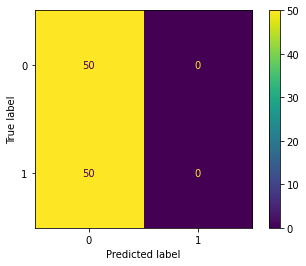

********* Performing experiment [1]/[5] with Moving average window size:10 *******
No of training samples with moving average 10 days : 3580
No of test samples  with moving average 10 days    : 100

Accuracy on training examples with moving average 10 days: 99.97%
Accuracy on test examples  with moving average 10 days    : 50.00%
Best Selected feature based on 1R is 6, Daily_returns



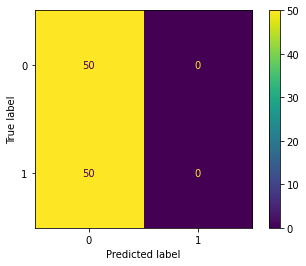

********* Performing experiment [2]/[5] with Moving average window size:20 *******
No of training samples with moving average 20 days : 3570
No of test samples  with moving average 20 days    : 100

Accuracy on training examples with moving average 20 days: 99.97%
Accuracy on test examples  with moving average 20 days    : 35.00%
Best Selected feature based on 1R is 5, MA_20



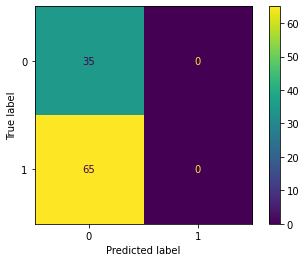

********* Performing experiment [3]/[5] with Moving average window size:50 *******
No of training samples with moving average 50 days : 3540
No of test samples  with moving average 50 days    : 100

Accuracy on training examples with moving average 50 days: 100.00%
Accuracy on test examples  with moving average 50 days    : 39.00%
Best Selected feature based on 1R is 6, Daily_returns



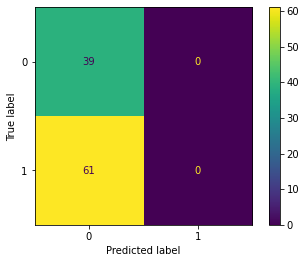

********* Performing experiment [4]/[5] with Moving average window size:200 *******
No of training samples with moving average 200 days : 3390
No of test samples  with moving average 200 days    : 100

Accuracy on training examples with moving average 200 days: 100.00%
Accuracy on test examples  with moving average 200 days    : 0.00%
Best Selected feature based on 1R is 5, MA_200



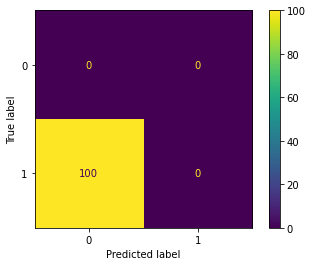

In [6]:
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
Windows = [5, 10, 20, 50, 200]
for i, Window in enumerate(Windows):
    
    print("********* Performing experiment [{}]/[{}] with Moving average window size:"
          "{} *******".format(i, len(Windows), Window))
    feat = 'MA_{}'.format(Window)
    df_new_MA = df_raw[["Open", "High", "Low",  "Volume", "Adjusted", feat]]
    df_new_MA['Daily_returns'] = 100*((df_new_MA[feat] - df_new_MA[feat].shift())/ df_new_MA[feat].shift())
    
    conditions = [(df_new_MA['Daily_returns'] >= 0.0),(df_new_MA['Daily_returns'] < 0.0)] 
    values = ['Up', 'Down']
    df_new_MA['Decision'] = np.select(conditions, values)

    # remove the fews row, since it is not possible to calculate 
    # daily return with moving average of initial days
    df_new_MA = df_new_MA[Window:]
    df_new_MA.head(8)    
    le = preprocessing.LabelEncoder()
    decision_MA = le.fit(df_new_MA["Decision"].shift(-1))
    decision_MA = le.transform(df_new_MA["Decision"].shift(-1))
    #print(tabulate(df_new_MA.head(10), headers='keys', tablefmt='psql'))
    
    xd_train_IBM_MA =  df_new_MA[:-102]
    xd_test_IBM_MA  =  df_new_MA[-102:-2]

    y_train_IBM_MA =  decision_MA[:-102]
    y_test_IBM_MA  =  decision_MA[-102:-2]

    print("No of training samples with moving average {} days : {}".format(Window,len(xd_train_IBM_MA)))
    print("No of test samples  with moving average {} days    : {}\n".format(Window, len(xd_test_IBM_MA)))
    
    oner = OneRClassifier()
    oner.fit(xd_train_IBM_MA.to_numpy(),y_train_IBM_MA)

    accuracy = accuracy_score(y_train_IBM_MA, oner.predict(xd_train_IBM_MA.to_numpy()))
    print("Accuracy on training examples with moving average {} days: {:.2f}%".format(Window,100*accuracy))

    y_pred_ibm_MA = oner.predict(xd_test_IBM_MA.to_numpy())
    accuracy = accuracy_score(y_test_IBM_MA, y_pred_ibm_MA)
    print("Accuracy on test examples  with moving average {} days    : {:.2f}%".format(Window,100*accuracy))
    cmp = ConfusionMatrixDisplay.from_predictions(y_test_IBM_MA, y_pred_ibm_MA)
    #cmp.plot()
    #cmp.show()
    
    print("Best Selected feature based on 1R is {}, {}\n".format(oner.feature_idx_, 
                                                                  df_new_MA.columns[oner.feature_idx_]))


    
    plt.show()
    


## As observed from above plots, the test accuracy is high of 50% for moving average of 5 and 10 days.